DATA CLEANING

In [20]:
import pandas as pd

data = pd.read_excel(r'C:\Users\rawat\Downloads\Surface_Water__Monitoring_Data_2024_9.xlsx')  

data.columns = data.iloc[0] 
data = data[1:]  

data = data.dropna(subset=['Month', 'Temp', 'pH'], how='all') 
data = data[~data['Month'].str.contains('S.No', na=False)] 
data = data[data['Temp'] != 'Temp'] 


data.columns = ['S.No', 'Month', 'Temp', 'pH', 'TDS (mg/l)', 'EC (µS/cm)', 'DO (mg/l)',
                'Chloride (mg/l)', 'Hardness (mg/l)', 'Calcium (mg/l)', 'Magnesium (mg/l)',
                'Alkalinity (mg/l)', 'BOD (mg/l)', 'COD (mg/l)', 'TC (MPN/100 ml)',
                'FC (MPN/100 ml)', 'Fecal Streptococcus (MPN/100 ml)', 'Nitrate-N (mg/l)',
                'Nitrite-N (mg/l)', 'Sulphate (mg/l)', 'Phosphate (mg/l)', 'Fluoride (mg/l)',
                'Sodium (mg/l)', 'Potassium (mg/l)', 'SAR', 'DBU Water Quality Criteria']


data['Temp'] = data['Temp'].str.replace('°C', '', regex=True).str.strip()
data['Temp'] = pd.to_numeric(data['Temp'], errors='coerce') 


data = data.dropna(subset=['Temp'])


data = data.fillna(data.mean(numeric_only=True)) 


data.to_excel('cleaned_data.xlsx', index=False)


print(data.head())


  S.No   Month  Temp    pH TDS (mg/l) EC (µS/cm) DO (mg/l) Chloride (mg/l)  \
1    1  May-24   8.0  7.72         24         39      11.4               1   
4    2  Sep-24  13.0   7.5         35         55        11               4   
7    3  Jan-24   8.0  7.45         28         43        12               2   
8  NaN  Feb-24   7.0  7.62         33         51      11.8               3   
9  NaN  Mar-24   7.0   7.5         30         47      11.6               4   

  Hardness (mg/l) Calcium (mg/l)  ... Fecal Streptococcus (MPN/100 ml)  \
1              40             33  ...                             <1.8   
4              50             40  ...                             <1.8   
7              30             22  ...                             <1.8   
8              36             26  ...                             <1.8   
9              34             22  ...                             <1.8   

  Nitrate-N (mg/l) Nitrite-N (mg/l) Sulphate (mg/l) Phosphate (mg/l)  \
1             

DATA PREPROCESSING

In [21]:

def clean_column(column):

    return column.replace(r'<', '', regex=True).astype(float)

columns_to_clean = ['Fecal Streptococcus (MPN/100 ml)']
for col in columns_to_clean:
    data[col] = clean_column(data[col])


numeric_cols = ['Temp', 'pH', 'TDS (mg/l)', 'EC (µS/cm)', 'DO (mg/l)', 
                'Chloride (mg/l)', 'Hardness (mg/l)', 'Calcium (mg/l)', 
                'Magnesium (mg/l)', 'Alkalinity (mg/l)', 'BOD (mg/l)', 
                'COD (mg/l)', 'Nitrate-N (mg/l)', 'Phosphate (mg/l)', 
                'Sodium (mg/l)', 'Potassium (mg/l)', 'SAR']


data_numeric = data[numeric_cols]


data_numeric = data_numeric.apply(pd.to_numeric, errors='coerce')


data_numeric = data_numeric.fillna(data_numeric.mean())


data_numeric.to_excel('final_cleaned_data.xlsx', index=False)


print(data_numeric.head())


   Temp    pH  TDS (mg/l)  EC (µS/cm)  DO (mg/l)  Chloride (mg/l)  \
1   8.0  7.72        24.0        39.0       11.4              1.0   
4  13.0  7.50        35.0        55.0       11.0              4.0   
7   8.0  7.45        28.0        43.0       12.0              2.0   
8   7.0  7.62        33.0        51.0       11.8              3.0   
9   7.0  7.50        30.0        47.0       11.6              4.0   

   Hardness (mg/l)  Calcium (mg/l)  Magnesium (mg/l)  Alkalinity (mg/l)  \
1               40              33          7.000000                 32   
4               50              40         41.954003                 45   
7               30              22          8.000000                 27   
8               36              26         10.000000                 31   
9               34              22         12.000000                 32   

   BOD (mg/l)  COD (mg/l)  Nitrate-N (mg/l)  Phosphate (mg/l)  Sodium (mg/l)  \
1    1.000000       4.000              0.05           

IMPORTING THE LIBRARIES

In [22]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


SPLITTING THE DATA IN TRAINING AND TESTING SETS

In [23]:
X_train, X_test = train_test_split(data_numeric, test_size=0.2, random_state=42)

BUILDING, COMPILING AND TRAINING THE AUTOENCODER MODEL

In [24]:

autoencoder = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)), 
    Dense(8, activation='relu'), 
    Dense(16, activation='relu'),
    Dense(X_train.shape[1], activation='linear')
])


autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()


history = autoencoder.fit(
    X_train, X_train, 
    epochs=50, 
    batch_size=16, 
    validation_data=(X_test, X_test), 
    verbose=1
)

c:\Users\rawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 16)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 17)             │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 857 (3.35 KB)

 Trainable params: 857 (3.35 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 12709.8818 - val_loss: 10625.2881
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8852.4111 - val_loss: 7726.6313
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5800.2827 - val_loss: 3358.6792
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2393.1721 - val_loss: 1152.2052
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 779.5270 - val_loss: 590.4028
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 385.4703 - val_loss: 457.4708
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 326.7085 - val_loss: 426.6971
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 310.7780 - val_loss: 418.6414
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 291.2462 - val_loss: 416.3141
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 271.7943 - val_loss: 411.4767
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 364.8933 - val_loss: 408.2303
Epoch 12/50
30/30 ━━

DETECTING THE ANOMALIES 

In [25]:

reconstructed = autoencoder.predict(X_test)
reconstruction_errors = np.mean(np.power(X_test - reconstructed, 2), axis=1)


threshold = np.percentile(reconstruction_errors, 95)


anomalies = reconstruction_errors > threshold


X_test_with_anomalies = X_test.copy()
X_test_with_anomalies['Anomaly'] = anomalies


X_test_with_anomalies.to_excel('test_data_with_anomalies.xlsx', index=False)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step 


PRINT THE SUMMARY

In [26]:

print(f"Number of anomalies detected: {np.sum(anomalies)}")
print(X_test_with_anomalies.head())

Number of anomalies detected: 6
     Temp    pH  TDS (mg/l)  EC (µS/cm)  DO (mg/l)  Chloride (mg/l)  \
734  16.0  7.47       129.0       220.0        8.2             23.0   
355  17.0  7.80       120.0       194.0        9.4              6.5   
712  17.0  7.44       108.0       160.0        8.0             11.0   
412  18.0  7.91        91.0       139.0        9.8              7.0   
266  18.0  7.72        78.0       118.0       10.0              6.0   

     Hardness (mg/l)  Calcium (mg/l)  Magnesium (mg/l)  Alkalinity (mg/l)  \
734              214             110             104.0                168   
355              130              82              48.0                 95   
712              170              96              74.0                140   
412               97              73              24.0                 93   
266               82              58              24.0                 79   

     BOD (mg/l)  COD (mg/l)  Nitrate-N (mg/l)  Phosphate (mg/l)  \
734        

VISUALIZING THE RECONSTRUCTION ERRORS,ANOMALIES IN RECONSTRUCTION ERRORS,VISUALIZING 'TEMP' DISTRIBUTIONS AND PAIR PLOT OF SELECTED FEATURES(ANOMALIES VS NORMAL DATA)

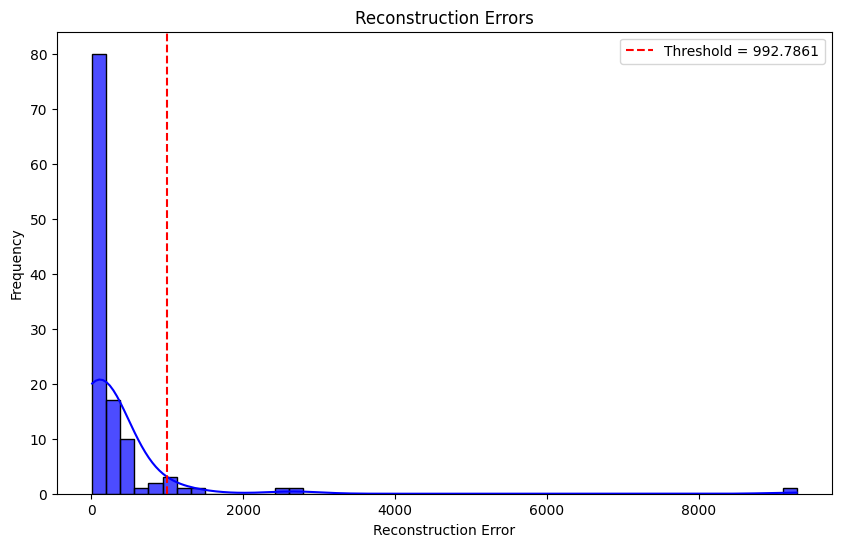

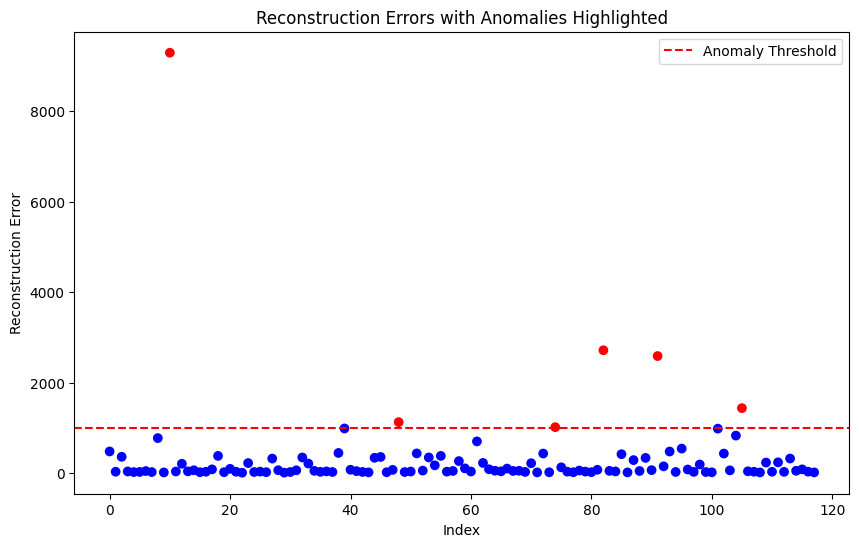

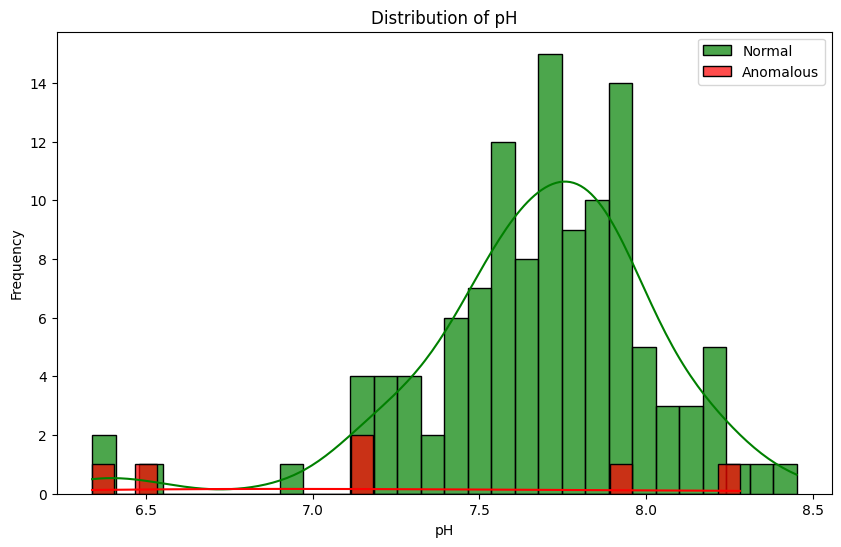

c:\Users\rawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\rawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\rawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

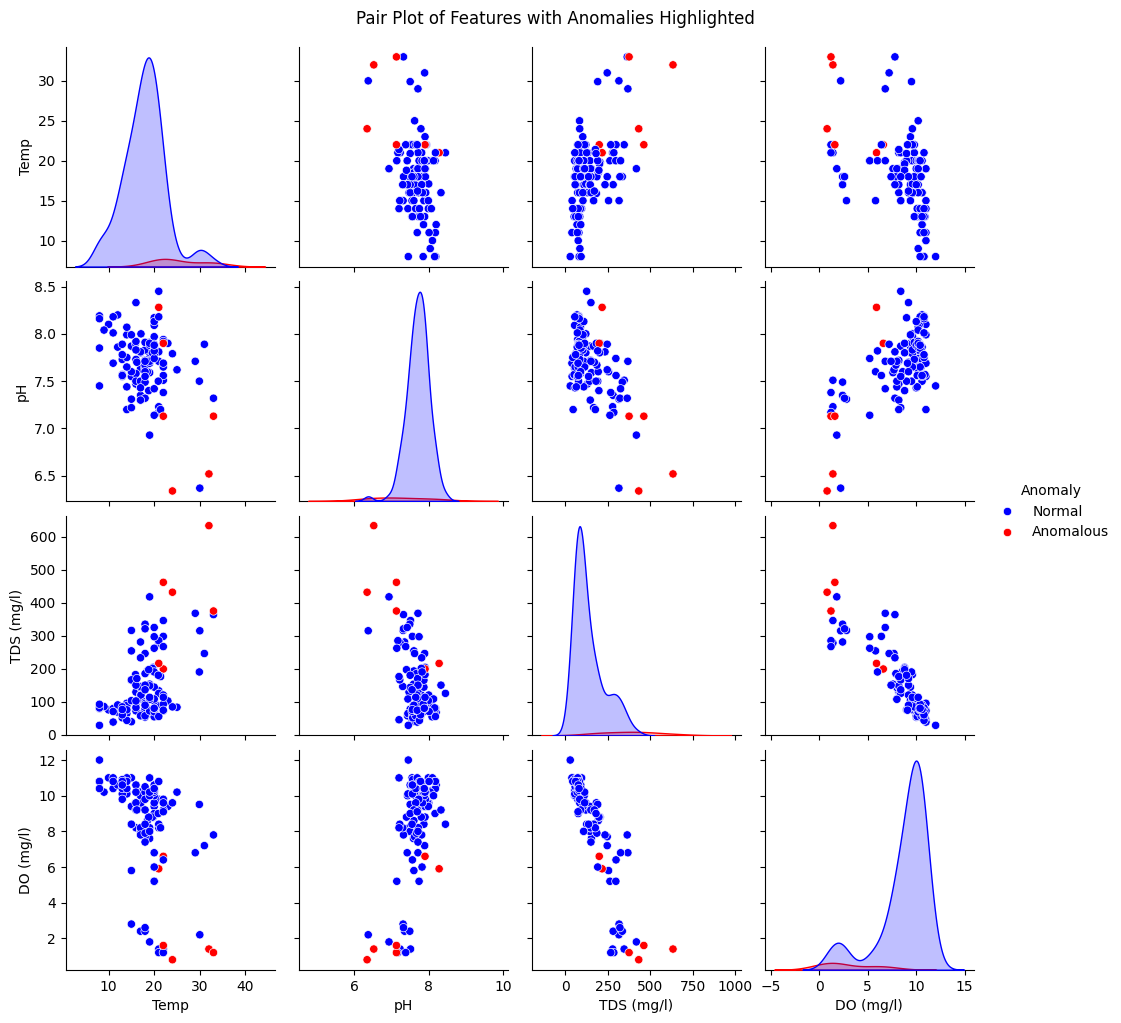

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(reconstruction_errors, bins=50, kde=True, color='blue', alpha=0.7)
plt.axvline(threshold, color='red', linestyle='--', label=f'Threshold = {threshold:.4f}')
plt.title('Reconstruction Errors')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(range(len(reconstruction_errors)), reconstruction_errors, c=['red' if x > threshold else 'blue' for x in reconstruction_errors])
plt.axhline(threshold, color='red', linestyle='--', label='Anomaly Threshold')
plt.title('Reconstruction Errors with Anomalies Highlighted')
plt.xlabel('Index')
plt.ylabel('Reconstruction Error')
plt.legend()
plt.show()


feature = 'pH'
plt.figure(figsize=(10, 6))
sns.histplot(X_test[feature], bins=30, kde=True, color='green', alpha=0.7, label='Normal')
sns.histplot(X_test_with_anomalies[X_test_with_anomalies['Anomaly']][feature], bins=30, kde=True, color='red', alpha=0.7, label='Anomalous')
plt.title(f'Distribution of {feature}')
plt.xlabel(feature)
plt.ylabel('Frequency')
plt.legend()
plt.show()


selected_features = ['Temp', 'pH', 'TDS (mg/l)', 'DO (mg/l)'] 
X_test_with_anomalies['Anomaly'] = X_test_with_anomalies['Anomaly'].map({True: 'Anomalous', False: 'Normal'})

sns.pairplot(X_test_with_anomalies, vars=selected_features, hue='Anomaly', palette={'Normal': 'blue', 'Anomalous': 'red'})
plt.suptitle('Pair Plot of Features with Anomalies Highlighted', y=1.02)
plt.show()


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Model Accuracy: 0.05084745762711865

Classification Report:
               precision    recall  f1-score   support

      Normal       0.00      0.00      0.00         0
   Anomalous       1.00      0.05      0.10       118

    accuracy                           0.05       118
   macro avg       0.50      0.03      0.05       118
weighted avg       1.00      0.05      0.10       118



c:\Users\rawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

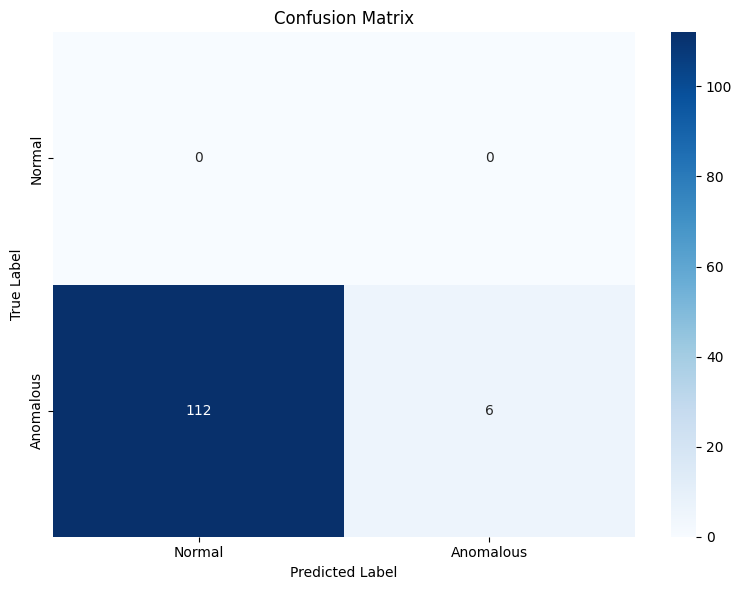

C:\Users\rawat\AppData\Local\Temp\ipykernel_22088\2395964486.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='viridis')
c:\Users\rawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\rawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_gr

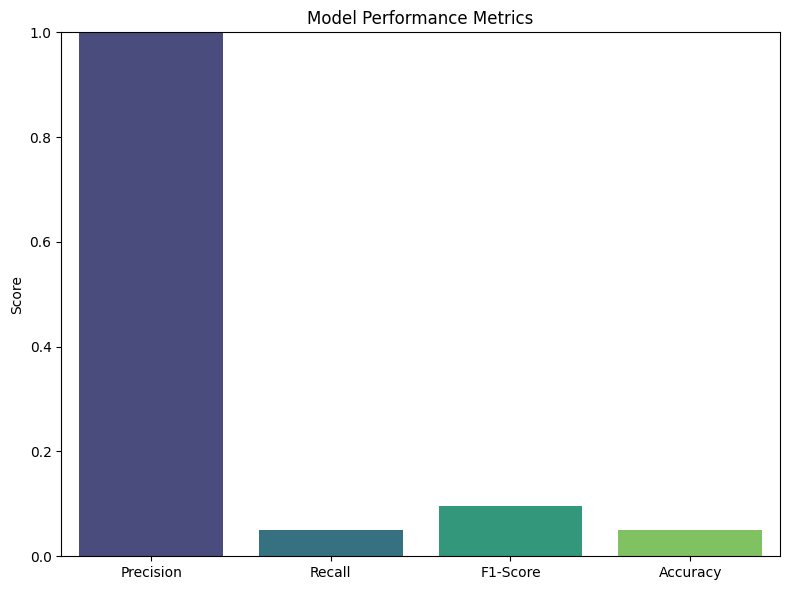

In [28]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


reconstructed = autoencoder.predict(X_test) 
reconstruction_errors = np.mean(np.power(X_test - reconstructed, 2), axis=1)

y_pred = reconstruction_errors > threshold

y_true = X_test_with_anomalies['Anomaly'].astype(bool).values


accuracy = accuracy_score(y_true, y_pred)
classification_rep = classification_report(y_true, y_pred, target_names=['Normal', 'Anomalous'])

print("Model Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)


conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomalous'], yticklabels=['Normal', 'Anomalous'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


precision = conf_matrix[1, 1] / (conf_matrix[0, 1] + conf_matrix[1, 1]) 
recall = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])    
f1_score = 2 * (precision * recall) / (precision + recall)


metrics = {'Precision': precision, 'Recall': recall, 'F1-Score': f1_score, 'Accuracy': accuracy}
plt.figure(figsize=(8, 6))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='viridis')
plt.title('Model Performance Metrics')
plt.ylim(0, 1) 
plt.ylabel('Score')
plt.tight_layout()
plt.show()
